<h1 style="text-align:center;">A Primitive Model for Verifying Decay Law using <br>Randomized Simulations</h1>
 <p style="text-align:center;">Pragnesh Barik<br>H-21</p>
 <p style="text-align:center;">20 April, 2022</p>

In [4]:
%matplotlib notebook
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython import display

In [5]:
def populate(n) :
    pts=[]
    for i in range(n):
        for j in range(n):
            pts.append([i,j])
    return pts

In [6]:
def grid_to_xy(pts) :
    x=[]
    y=[]
    for i in pts :
        x.append(i[0])
        y.append(i[1])
    return x, y

In [7]:
def decay(decay_constant, pts) :
    n=len(pts)
    to_decay=decay_constant*n
    for i in range(int(to_decay)):
        pts.pop(random.randrange(len(pts)))
    return pts

In [8]:
def animate_plot(frames, decay_constant, n):
    pts=populate(n)
    x=[0]*(frames+1)
    y=[0]*(frames+1)
    x[0]=(grid_to_xy(pts)[0])
    y[0]=(grid_to_xy(pts)[1])
    for i in range(frames):
        pts=decay(decay_constant, pts)
        x[i+1]=grid_to_xy(pts)[0]
        y[i+1]=grid_to_xy(pts)[1]
    return x, y

In [9]:
x, y = animate_plot(1000, 0.001, 100)

<IPython.core.display.Javascript object>


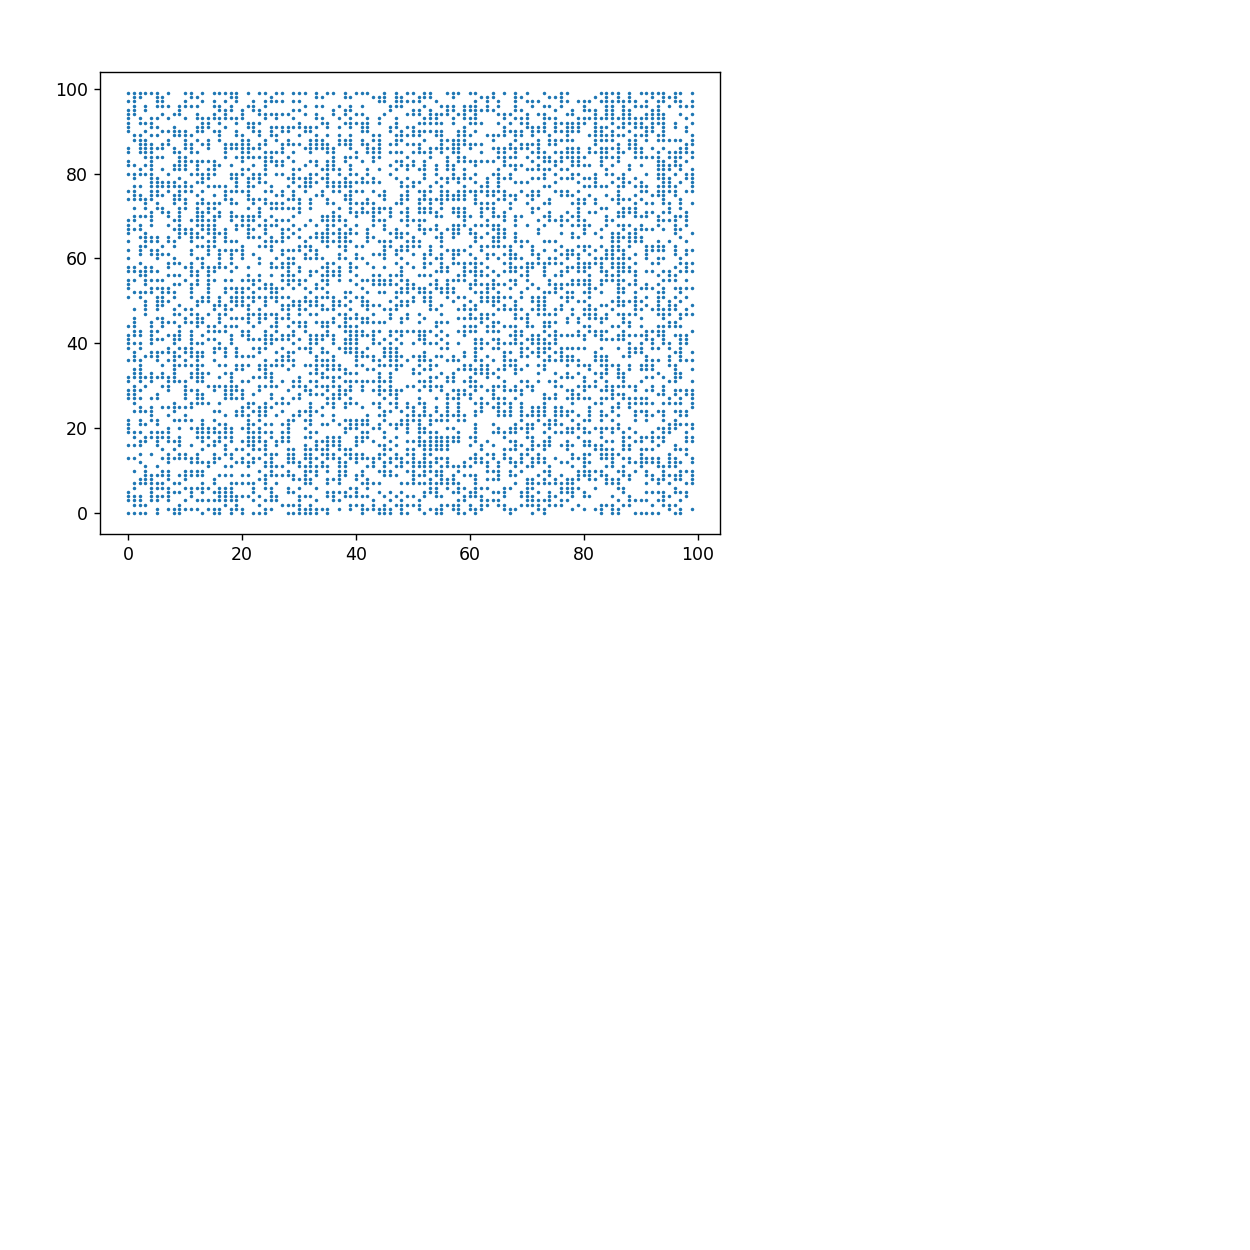

In [ ]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
sc = ax.scatter(x[0],y[0], s=1)
def animate(i):
    sc.set_offsets(np.c_[x[i],y[i]])

anim = animation.FuncAnimation(fig, animate, frames=1000, interval=60) 
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()         

## Sequential Reactions

In [17]:
def sequential_decay(k1, k2, A_n, B_n, C_n) :
    k1_A=k1*len(A_n)
    k2_B=k2*len(B_n)
    for i in range(int(k1_A)):
        B_n.append(A_n.pop(random.randrange(len(A_n))))
    for j in range(int(k2_B)) :
        C_n.append(B_n.pop(random.randrange(len(B_n))))
    return A_n, B_n, C_n

In [18]:
A_n=populate(100)

In [19]:
A_n, B_n, C_n = sequential_decay(0.01, 0.01, A_n, [], [])

In [20]:
count_A=[]
count_B=[]
count_C=[]
for i in range(1000):
    A_n, B_n, C_n = sequential_decay(0.01, 0.01, A_n, B_n, C_n)
    count_A.append(len(A_n))
    count_B.append(len(B_n))
    count_C.append(len(C_n))

<IPython.core.display.Javascript object>


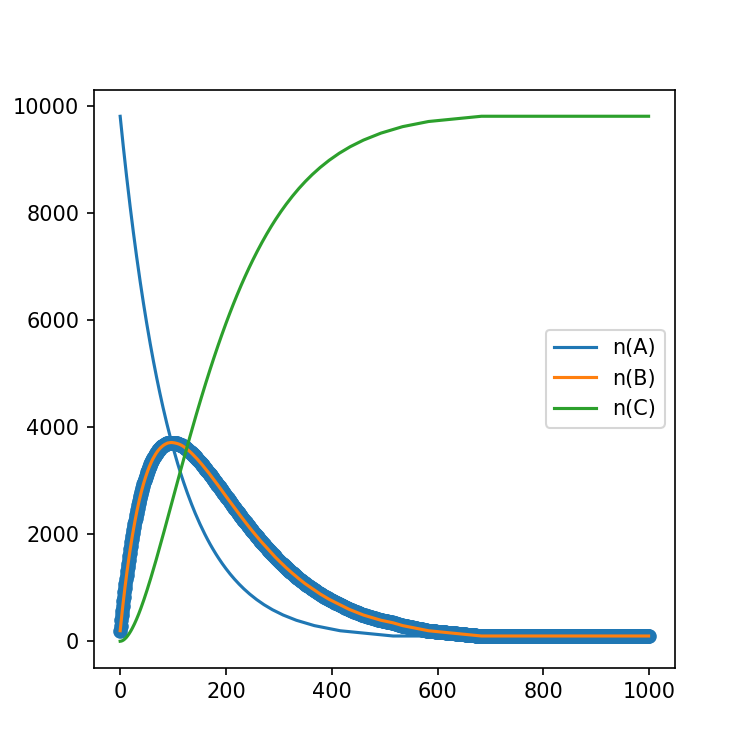

In [21]:
import matplotlib
matplotlib.rcParams['figure.dpi'] = 100

plt.figure(figsize=(5,5))
plt.plot(np.arange(len(count_A)), count_A, label="n(A)")
plt.plot(np.arange(len(count_B)), count_B, label="n(B)")
plt.plot(np.arange(len(count_C)), count_C, label="n(C)")
plt.legend()
plt.show()

In [22]:
plt.scatter(np.arange(len(count_B)), count_B)

<IPython.core.display.Javascript object>


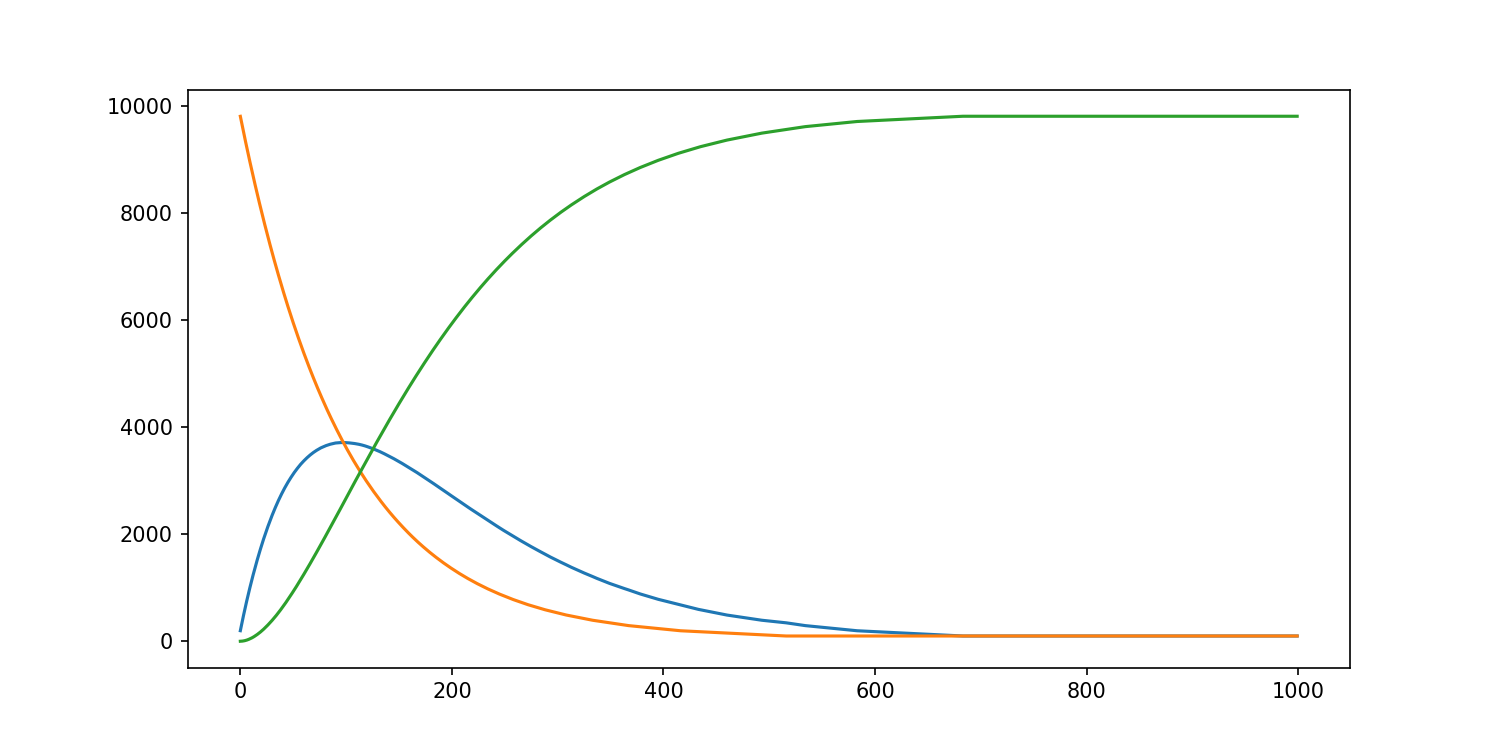

In [23]:
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)
def animate(i):
        ax.clear()
        ax.plot(np.arange(len(count_B[:i*20])), count_B[:i*20])
        ax.plot(np.arange(len(count_A[:i*20])), count_A[:i*20])
        ax.plot(np.arange(len(count_C[:i*20])), count_C[:i*20])

ani = FuncAnimation(fig, animate, frames=100, interval=500, repeat=False)

plt.show()

In [24]:
count_B

[198,
 295,
 390,
 483,
 574,
 663,
 750,
 835,
 918,
 999,
 1079,
 1157,
 1233,
 1307,
 1380,
 1452,
 1522,
 1590,
 1657,
 1722,
 1786,
 1849,
 1910,
 1969,
 2027,
 2084,
 2140,
 2194,
 2247,
 2299,
 2350,
 2399,
 2447,
 2494,
 2540,
 2584,
 2628,
 2670,
 2711,
 2751,
 2790,
 2828,
 2865,
 2901,
 2935,
 2969,
 3002,
 3033,
 3064,
 3094,
 3124,
 3152,
 3179,
 3206,
 3231,
 3256,
 3280,
 3304,
 3326,
 3347,
 3368,
 3388,
 3408,
 3426,
 3444,
 3461,
 3478,
 3494,
 3510,
 3524,
 3538,
 3551,
 3564,
 3576,
 3588,
 3599,
 3610,
 3619,
 3628,
 3637,
 3645,
 3653,
 3660,
 3667,
 3673,
 3679,
 3684,
 3689,
 3694,
 3698,
 3702,
 3704,
 3706,
 3708,
 3709,
 3710,
 3711,
 3711,
 3711,
 3710,
 3709,
 3708,
 3706,
 3704,
 3702,
 3699,
 3697,
 3695,
 3692,
 3689,
 3686,
 3682,
 3678,
 3674,
 3669,
 3664,
 3659,
 3653,
 3647,
 3641,
 3634,
 3627,
 3620,
 3613,
 3605,
 3597,
 3590,
 3582,
 3574,
 3566,
 3558,
 3549,
 3540,
 3531,
 3522,
 3512,
 3502,
 3492,
 3483,
 3473,
 3463,
 3453,
 3443,
 3432,
 3

In [25]:
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

ModuleNotFoundError: No module named 'jupyterthemes'

In [23]:
def init():
    line.set_data([], [])
    return (line,)
# animation function. This is called sequentially
def animate(i):
    line.set_data(x[i], y[i])
    return (line,)

In [24]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [25]:
plt.show()

In [26]:
len(x)

1001

In [ ]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
ax.scatter(x[0],y[0], s=1)
def animate(i):
    ax.scatter(x[i],y[i], s=1)

anim = animation.FuncAnimation(fig, animate, frames=1000, interval=60) 
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
         

<IPython.core.display.Javascript object>

In [ ]:
len(x)